In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Random Variables and Their Distributions

A **random variable** $X$ is an object that can be used to generate numbers, in a way that valid probabilistic statements about the generated numbers can be made.  For example:

\begin{align}
P(X > 0) & = 0.5 \\
P(-1 < X < 1) & = 0.25 \\
P(X < 0) & = 0 \\
P(X > 1 \mid X > 0) & = 0.5 
\end{align}

are all probabilistic statements about an unknown random variable.

**Discussion:** Traslate the notational probability statements above into *english* equivelents.

From a programming perspective, a random variable is a type of object that implements a single public method: `sample`.

In [2]:
class RandomVariable:
    
    def __init__(self, parameters):
        self._parameters = parameters
        
    def sample(self):
        '''Return a random sample from the variable.'''
        return algorithm_for_sampling_from_this_variable()

Unfortunately, not everyone (cough... scipy...) chooses to call the method `sample`, but, so it goes...

## Describing Probability Patterns: Distributions

If a random variable is a device for generating numbers that follow some probability law, we need some mechanism for describing this pattern of probabilities.

The pattern of probabilites of a random variable is called its **distribution**, and there are a few mathematical do-dads used to describe them.  Which do-dad is approporiate depends on whether the random variable generates **discrete** or **continuous** values.

  - Discrete values are usually integers, and the most common case is a count of something.
  - Continuous values can take on any of a range of values (i.e. any [real numbers](https://en.wikipedia.org/wiki/Real_number) in a range).  These random variables usually represent a measurement of something.

### The Discrete Case: Distribution and Mass Functions

One very general probabilistic statement we can make about a random variable (that applies to both the discrete and continuous cases) is to compute the **function**

$$ F_X(t) = P(X \leq t) $$

this is called the **[cumulative distribution](https://en.wikipedia.org/wiki/Cumulative_distribution_function)** or just **distribution** function (or sometimes **CDF** for those into acronyms).  In a sense we could make precise (but won't, because the detour is large), it says everything we can hope to say about the distribution of a random variable.

In the case that our random variable outputs **discrete** values, we can enumerate those values that are less than any number $t$.

$$ \text{Possible output values from X that are} \leq t = \{x_1, x_2, \ldots, x_k\} $$

Each of these values has some probability of occuring:

$$ P(X = x_i) = \text{some number between zero and one} $$

Taken all together, these probabilities form the **[probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function)** of a discrete random variable.

> Given a possible output value from $X$, the probability mass function spits out the probability of that value occuring.

$$ f_X(t) = P(X = t) $$

Note that $f_X$ outputs *zero* for most inputs, since there is only discrete set of possiblities from $X$.

Text(0.5, 1.0, 'Sum Up the Mass Function')

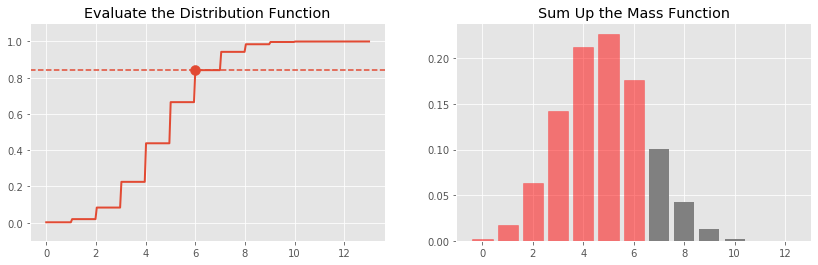

In [3]:
binomial = stats.binom(n=12, p=0.4)

x = np.linspace(0, 13, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, binomial.cdf(x), linewidth=2)
ax[0].scatter(6, binomial.cdf(6), s=100)
ax[0].axhline(y=binomial.cdf(6), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("Evaluate the Distribution Function")

bars = ax[1].bar(range(12 + 1), [binomial.pmf(i) for i in range(12 + 1)], align="center", color="grey")
for i in range(6 + 1):
    bars[i].set_color((1.0, 0, 0, 0.5))

ax[1].set_title("Sum Up the Mass Function")

Notice how the distribution function (the CDF) makes jumps at each integer.  This is the hallmark of a discrete random variable.

The relationship between the two concepts can be summarized as:

> The cumulative distribution function evaluated at $t$ is the sum of the probability mass for all numbers less than or equal to $t$.

or in notation:

$$ F_X(t) = \sum_{x_i \leq t} f_X(x_i) $$

Text(0.5, 1.0, 'The Jumps in the CDF are the Heights of the Bars')

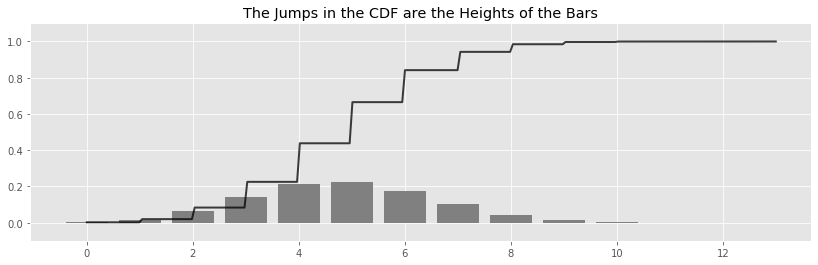

In [4]:
binomial = stats.binom(n=12, p=0.4)

x = np.linspace(0, 13, num=250)
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(x, binomial.cdf(x), linewidth=2, color="black", alpha=0.75)
bars = ax.bar(range(12 + 1), [binomial.pmf(i) for i in range(12 + 1)], align="center", color="grey")
    
ax.set_ylim(-0.1, 1.1)
ax.set_title("The Jumps in the CDF are the Heights of the Bars")

## A Catalouge of Useful Discrete Distributions and the Situations They Describe

Humans have discovered and catalouged many, many distributions that are intended to describe various situations that arise in science and data analysis.  It would be impossible (And useless) to list them all here, so we will stick to the ones that either:

  - Will be used in this class.
  - Will commonly arise in the work and research of an everyday data scientist.

In [25]:
def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = ["{}={}".format(name,value) for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')
    
def draw_pmf_grid(dist, param_names, param_values, xpts, height=2):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend()
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()

### The Uniform Distribution

The [Uniform Distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) is the most familiar discrete distribution.  It describes a situation with a finite number of outcomes, where each outcome is as equally likely as any other.  For example, a die roll is uniformly distributed, with 6, or 10, or 12, or 20 possible outcomes, depending on the number of sides of the die.

![Dice](images/dice.jpg)

The **probability mass function** of the (discrete) uniform distribution is:

$$ f(k) = \frac{1}{\text{# of outcomes}} $$

and the **distribution function** is:

$$ F(k) = \frac{\text{# of outcomes} \leq k}{\text{# of outcomes}} $$

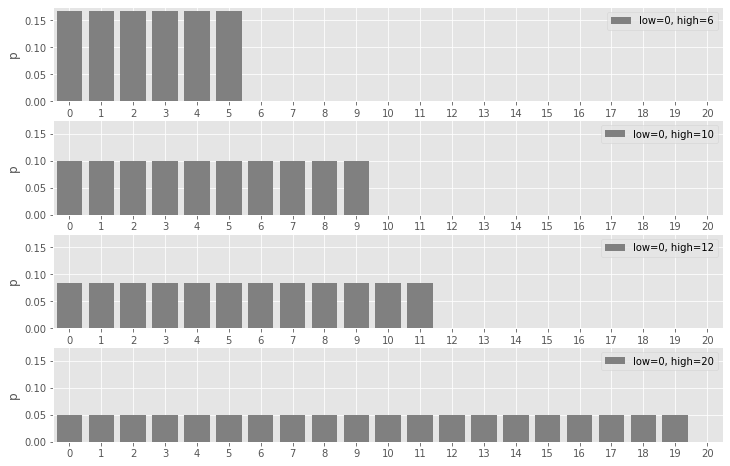

In [6]:
draw_pmf_grid(stats.randint, 
              param_names=('low', 'high'), 
              param_values=[(0, 6), (0, 10), (0, 12), (0, 20)],
              xpts=range(21))

### The Bernoulli Distribution

The [**Bernoulli distribution**](https://en.wikipedia.org/wiki/Bernoulli_distribution) is the simplest discrete distribution.  It is a model of a single flip of a, possibly unfair, coin.

Precisely, a random variable $X$ has a Bernoulli distribution if:

  - There are only two possible outputs fro $X$, traditionally labeled $0$ and $1$.
  - There is a probability of $p$ that $X$ outputs $1$.
  
The **probability mass function** of the Bernoulli distribution is:

$$  f(k) = \begin{cases}
      1-p, & \text{if}\ k=0 \\
      p, & \text{if}\ k=1
    \end{cases}
$$

And the **distribution function** of the Bernoulli distribution is:

$$  F(k) = \begin{cases}
      0, & \text{for}\ k<0 \\
      1-p, & \text{for}\ 0 \le k<1 \\
      1, & \text{for}\ k \ge1 \\
    \end{cases}
$$

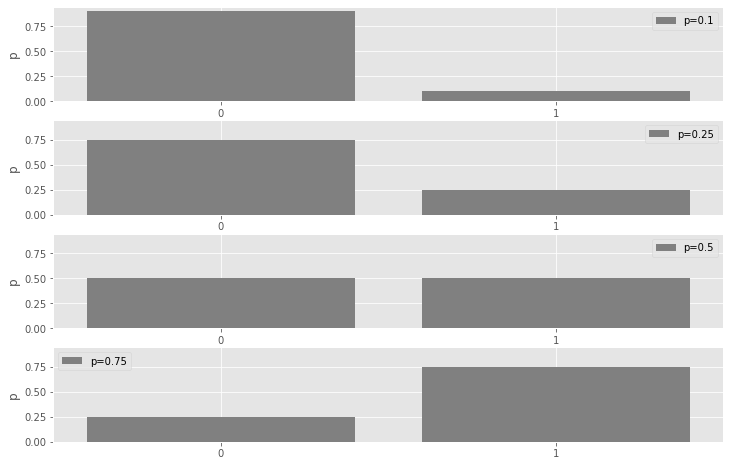

In [7]:
draw_pmf_grid(stats.bernoulli, 
              param_names='p', 
              param_values=[(0.1,), (0.25,), (0.5,), (.75,)],
              xpts=[0, 1])

### Binomial Distribution

The [**Binomial distribution**](https://en.wikipedia.org/wiki/Binomial_distribution) is another common discrete distribution.  It is a **counting** distribution, it models flipping a (possibly unfair) coin some number of times, and counting how many times the coin lands heads.

The probability mass function is

$$f(\text{k heads}) = {n \choose k} p^k (1-p)^{n-k} $$

Where:

  - $n$ is the number of times you flipped the coin.
  - $p$ is the probability a single flip results in heads.

This comes from the fact that there are $\displaystyle {n \choose k}$ ways in which the underlying Bernoulli distributions can have values of 1 or 0.

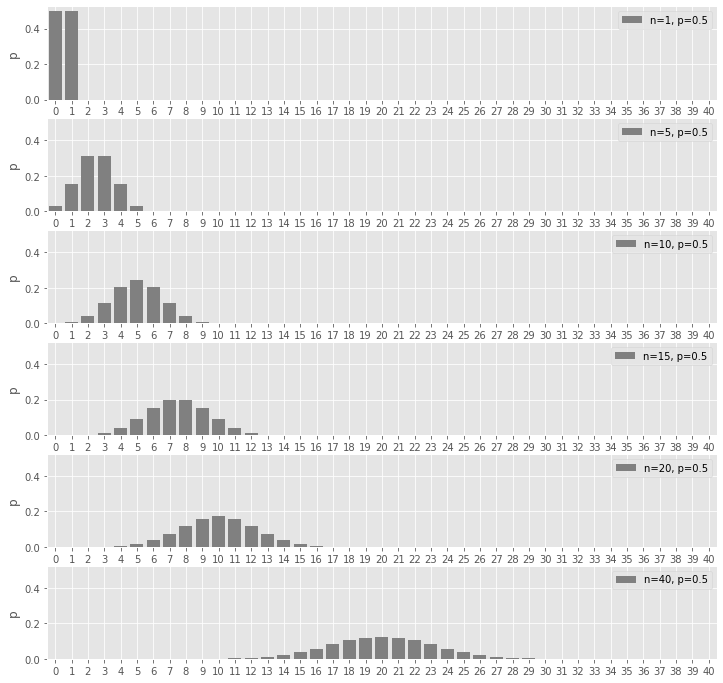

In [8]:
draw_pmf_grid(stats.binom, 
              param_names=('n', 'p'), 
              param_values=[(1, 0.5), (5, 0.5), (10, 0.5), (15, 0.5), (20, 0.5), (40, 0.5)], 
              xpts=range(0, 41))

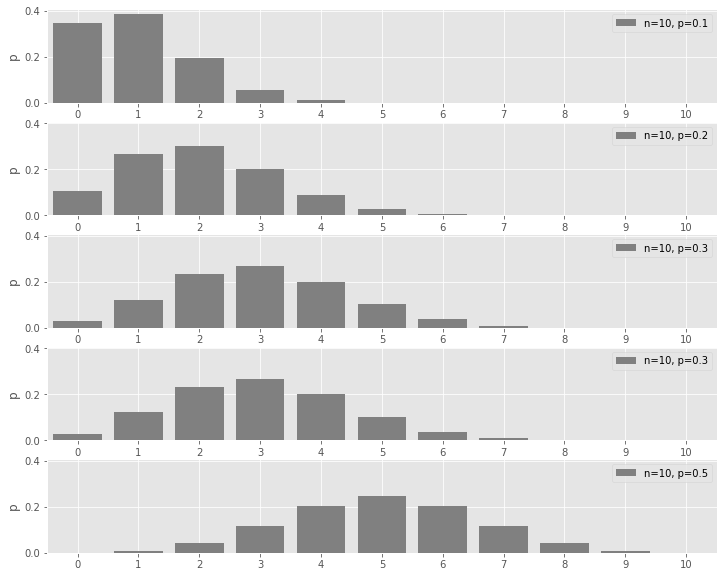

In [9]:
draw_pmf_grid(stats.binom, 
              param_names=('n', 'p'), 
              param_values=[(10, 0.1), (10, 0.2), (10, 0.3), (10, 0.3), (10, 0.5)], 
              xpts=range(0,11))

### The Hypergeometric Distribution

The [**Hypergeometric distribution**](https://en.wikipedia.org/wiki/Hypergeometric_distribution) is a another counting distribution.  This one models a deck of cards of two types (say red cards and blue cards).  If you shuffle the deck, draw some number of cards, and then count how many blue cards you have, this count is hypergeometrically distributed.

$$f(\text{$k$ blue cards}) = \displaystyle\frac{\displaystyle{K \choose k}{N-K \choose n-k}}{\displaystyle{N \choose n}}$$

Where:

  - $N$ is the total number of cards in the deck.
  - $K$ is the total number of **blue** cards in the deck.
  - $n$ is the size of the hand you drew.
  
The hypergeometric distribution is well known to anyone playing card games at a high level (poker, magic: the gathering).

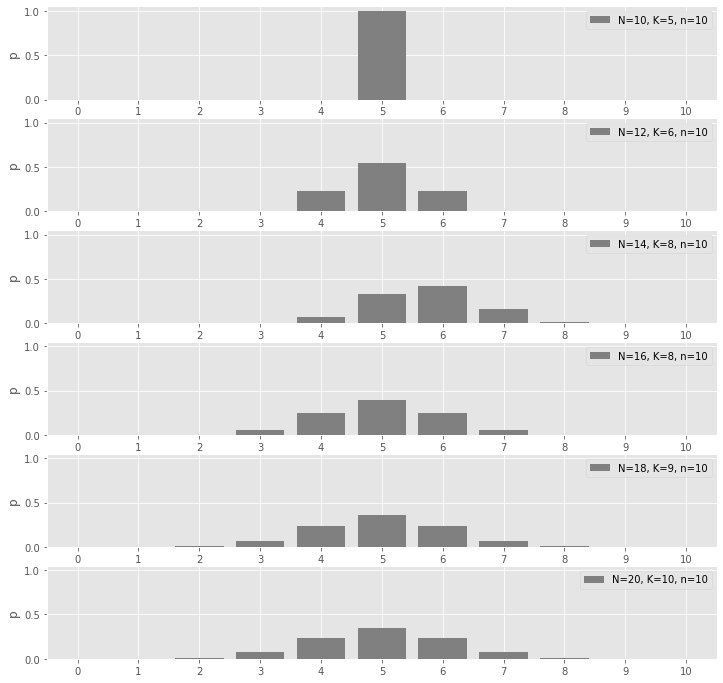

In [10]:
draw_pmf_grid(
    stats.hypergeom, 
    ('N', 'K', 'n'), 
    [(10, 5, 10), (12, 6, 10), (14, 8, 10), (16, 8, 10), (18, 9, 10), (20, 10, 10)], 
    range(0, 11))

### The Poisson Distribution

The [**Poisson distribution**](https://en.wikipedia.org/wiki/Poisson_distribution) is yet another counting distribution.  The Poisson distribution models a process where events happen at a fixed **rate or frequency**, and you're watching it for a fixed amount of time.  For example, the number of atom is a sample that radioactively decay, or the number of busses that arive at a stop in an hour, or the number of times I fall off my skateboard in an hour long session are all (aproximately) Poisson distributed.

The probability mass function of the Poisson distribution is:

$$f(k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Here:

  - $\lambda$ is the rate at which the events occur (for example, 2 per-hour, 6 per-day, 122 per-second, etc...).

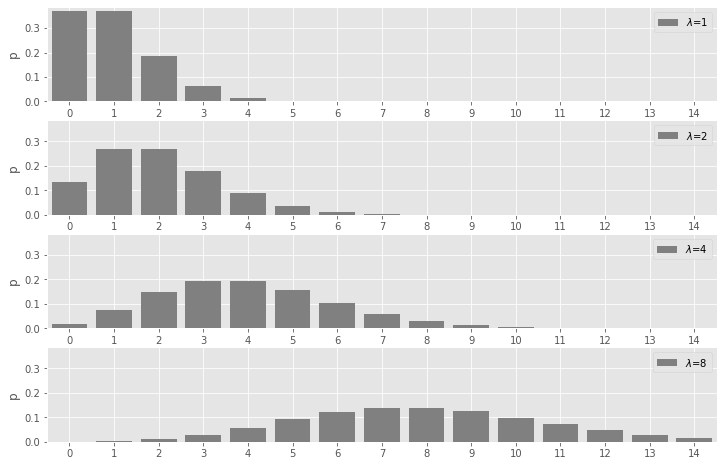

In [11]:
draw_pmf_grid(stats.poisson,
              param_names=(r'$\lambda$',), 
              param_values=[(1,), (2,), (4,), (8,)], 
              xpts=range(15))

### The Continuous Case: Density and Mass Functions

In the continuous case, our random variable can output **any** value (sometimes within some range), so the concept of "adding up all the probabilities of possiblities" doesn't make sense.

Fortuantely, the definition of the distribution function is exactly the same as in the discrete case:

$$ F_X(t) = P(X \leq t) $$

Instead of a probability mass function, we now have a **probability density function**.  While before, we went between the two by "adding up probability", now we need to use a concept from [calculus](https://en.wikipedia.org/wiki/Calculus), and [integrate](https://en.wikipedia.org/wiki/Integral):

$$ F_X(t) = P(X \leq t) = \int_{- \infty}^{t} f_X(t) dt $$

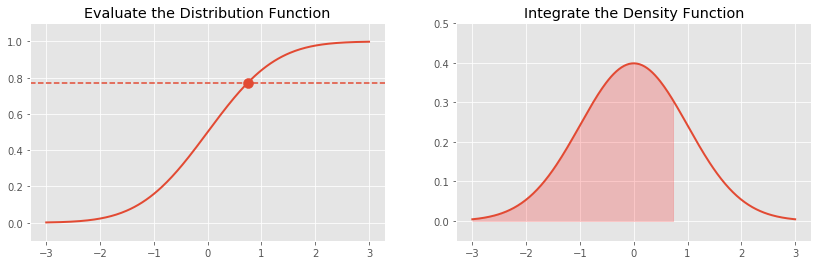

In [12]:
normal = stats.norm(0, 1)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].scatter(0.75, normal.cdf(0.75), s=100)
ax[0].axhline(y=normal.cdf(0.75), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("Evaluate the Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Integrate the Density Function")
ax[1].fill_between(x, normal.pdf(x), 0, 
                   where=( (x <= 0.75) ),
                   color="red", alpha=0.2)

The density function **does not** tell us the probability that our random variable will assume any specific value, but it **does** tell us the probability that the output of the random variable will fall into any given range.  Again, this connection requires integration:

$$P(a < X \leq b) = \int_{a}^{b} f_X(t) dt $$

Text(-1.3, 0.1, '$P(-1.5 < X \\leq 0.75)$')

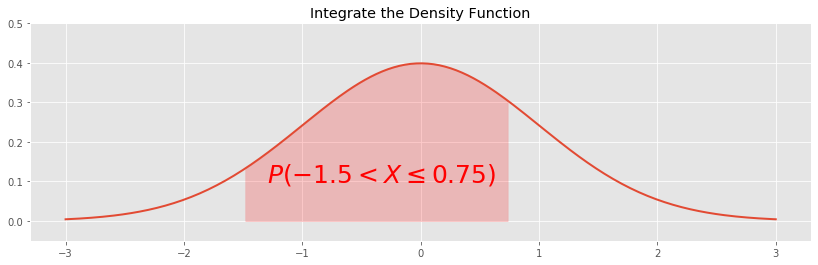

In [13]:
normal = stats.norm(0, 1)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(x, normal.pdf(x), linewidth=2)
ax.set_ylim(-0.05, 0.5)
ax.set_title("Integrate the Density Function")
ax.fill_between(x, normal.pdf(x), 0, 
                where=( (x > -1.5) & (x <= 0.75) ),
                color="red", 
                alpha=0.2)
ax.text(-1.3, 0.10, r"$P(-1.5 < X \leq 0.75)$", color="red", fontsize=25)

#### Summary

When we want to compute probabilities involving some random quantity, we can either:


  - Evaluate the distribution function.
  - Integrate the density function.

If niether the distribution or density/mass functions are available, then we **cannot compute probabilities about the random variable**.

## A Catalogue of Useful Continuous Distributions and the Situations They Describe

In [14]:
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''draw a pdf of a given distribution for given parameters'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)
    
def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''draw several pdfs for for various parameter values for a given distribution'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Probability')
    axs[1].set_ylabel('Probability Density')
    axs[0].legend()
    axs[1].legend()

### The Uniform Distribution

There is also a continuous version of the [Uniform Distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)). It also describes a set of outcomes that are all equally likely, but this time any number in an interval is a possible output of the random variable.  For example, the position a raindrop falls on a line segment (in a very large rainstorm) is uniformly distributed.

The **probability density function** of the (continuous) uniform distribution is:

$$ f(t) = \begin{cases}
    \displaystyle\frac{1}{b - a} & a < t \leq b \\
    0 & \text{otherwise}
\end{cases}
$$

and the **distribution function** is:

$$ f(t) = \begin{cases}
    0 & t < a \\
    \displaystyle\frac{1}{b - a}(t - a) & a < t \leq b \\
    1 & t \geq b
\end{cases}
$$

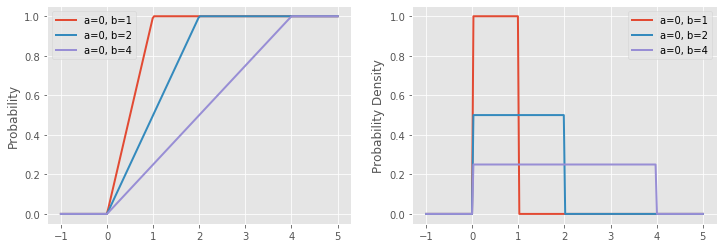

In [15]:
draw_continuous_distributions(stats.uniform, ("a", "b"), [(0,1),(0,2),(0,4)], -1, 5)

### The Normal or Gaussian Distribution


The [**Normal Distribution**](https://en.wikipedia.org/wiki/Normal_distribution) is of primary importance in probability and statistical theory due to the **[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)** (which we will discuss later in the course). 

The density function of the normal distribution is:

$$f_Z(t) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\Bigl[{-\frac{(t - \mu)^2}{2 \sigma}}\Bigr]$$

It has the characteristic "bell" shape.  It is very beautiful.

The distribution function of the normal distribution does not have a [closed form](https://en.wikipedia.org/wiki/Closed-form_expression), the best we can do is represent it as an integral:

$$ F_Z(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \int_{- \infty}^{x} \exp\Bigl[{-\frac{(t - \mu)^2}{2 \sigma}}\Bigr]dt $$

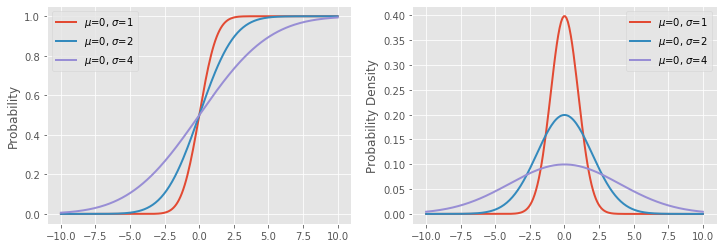

In [16]:
draw_continuous_distributions(stats.norm, (r"$\mu$", r"$\sigma$"), [(0,1),(0,2),(0,4)], -10, 10)

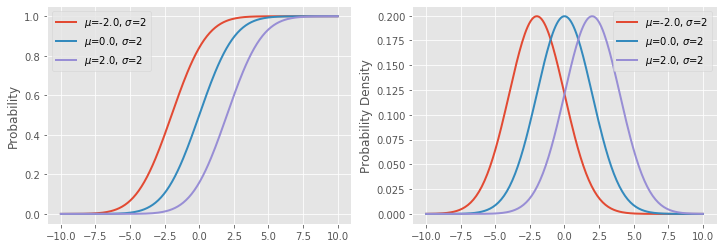

In [17]:
draw_continuous_distributions(stats.norm, (r"$\mu$", r"$\sigma$"), [(-2.0, 2), (0.0, 2), (2.0, 2)], -10, 10)

### The Exponential Distribution

The [**Exponential Distribution**](https://en.wikipedia.org/wiki/Exponential_distribution) is a continuous distribution related to the Poisson distribution.  Where the poisson distribution describes how many events you will observe if the events happen at a specific rate and you watch for a specific amount of time, the exponential distribution models the *amount of time* you will have to watch until you observe the first event.

For example, the amount of time you have to wait at a bus stop until a bus arives, and the amount of space you have to search before you find a dropped object tends to be exponentially distributed.

The **density function** of the exponential distribution is:

$$f(t) = \frac{1}{\theta} \exp\Bigl({-\frac{t}{\theta}}\Bigr) $$

and its **distribution function** is:

$$ F(x) = 1 - \exp\Bigl({-\frac{t}{\theta}}\Bigr)$$

Where:

  - $\theta$ is the *reciporical* of the rate at which the events occur.
  
It's also common to parameterize the exponential distribution with $\lambda = \displaystyle\frac{1}{\theta}$.

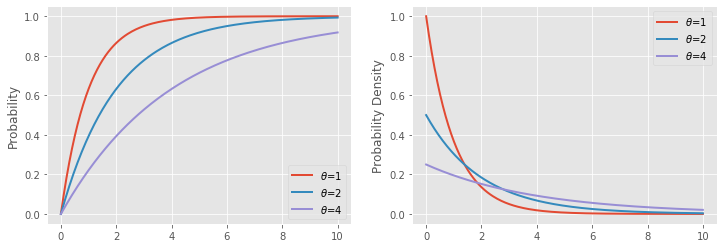

In [18]:
draw_continuous_distributions(stats.expon, (None, r"$\theta$"), [(0,1),(0,2),(0,4)], 0, 10)

### The Gamma Distribution

The [**Gamma Distribution**](https://en.wikipedia.org/wiki/Gamma_distribution) is a more general form of the exponential distribution.  The Gamma distribution describes the amount of time you would have to wait until you observe a given number of events occuring (instead of just a single event in the case of the exponential).

The **density function** of the Gamma distribution is:

$$f(t) = \frac{1}{(k-1)! \theta^k} t^{k-1}\exp\Bigl({-\frac{t}{\theta}}\Bigr)$$

Just like in the case of the normal distribution, there is no closed form for the distribution function of a Gamma distribution.  So it goes.

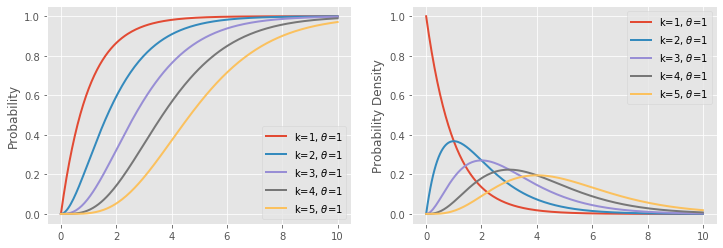

In [19]:
draw_continuous_distributions(stats.gamma, ("k", None, r"$\theta$"), [(1,0,1),(2,0,1),(3,0,1),(4,0,1),(5,0,1)], 0, 10)

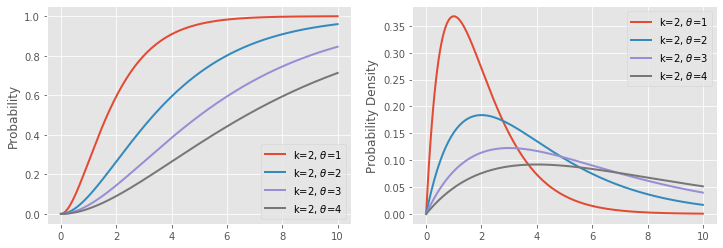

In [20]:
draw_continuous_distributions(stats.gamma, ("k", None, r"$\theta$"), [(2,0,1),(2,0,2),(2,0,3),(2,0,4)], 0, 10)

## Distributions in Scipy

The major tool for working with distributions in python is `scipy.stats`.  Unfortuantely, the interface design in `scipy.stats` is... not great.  The parameter names are non standard, and the names of some of the methods are not great.

#### Creating a Distribution Object

In [21]:
binomial = stats.binom(n=50, p=0.4)
poisson = stats.poisson(mu=5)
normal = stats.norm(loc=0.0, scale=1.0)
exponental = stats.expon(loc=2.0)

#### Evaluating the CDF

In [22]:
print("P(Binomial(n=50, p=0.4) <= 20) = ", binomial.cdf(20))
print("P(Normal(mu=0.0, sigma=1.0) <= 1.0 = ", normal.cdf(1.0))

P(Binomial(n=50, p=0.4) <= 20) =  0.5610349320400658
P(Normal(mu=0.0, sigma=1.0) <= 1.0 =  0.8413447460685429


#### Evaluating the PMF

In [23]:
print("P(Binom(n=50, p=0.4) == 20) = ", binomial.pmf(20))
print("P(Poisson(lambda=5) == 7) = ", poisson.pmf(7))

P(Binom(n=50, p=0.4) == 20) =  0.11455855282952349
P(Poisson(lambda=5) == 7) =  0.10444486295705395


Evaluating a PDF doesn't really have any meaning, so we'll leave that off.  It's mostly useful for plotting.

#### Sampling Random Numbers

The `rvs` (Random ValueS) method samples from a distribution object.

In [24]:
print("Ten random draws from a Binomial(n=50, p=0.4): ", binomial.rvs(10))
print("Ten random draws from a Normal(mu=0.0, sigma=1.0): ", normal.rvs(10))

Ten random draws from a Binomial(n=50, p=0.4):  [21 16 23 26 18 18 20 23 20 24]
Ten random draws from a Normal(mu=0.0, sigma=1.0):  [ 0.09407232 -0.21464438  1.03412948  0.29708715  0.49349605 -1.21753839
 -1.02263677  0.06740734  1.2281702   0.46696252]


## Some General Concepts from Probability Theory

Let's summarize:

  - Whenever we have a quantity that is random, the mathematical object we use to describe it is called a **random variable**.
  - We describe the pattern of randomness in a random variable using a **distribution**.  Distributions can be described by thier **distribution function**, or their **density / mass function**.

There are a couple of general concepts that arise often in the study of random variables.  One is very simple, the other is subtle, and its importance only becomes evident through experience.

### Identically Distributed

If two random variables have the **same** distribution function, we say they are **identically distributed**, and we denote this relationship notationally by:

$$ X \sim Y $$

In practice this means **any probabilistic statements we make about $X$ and $Y$ individually have the same answer**.

So for example, if $X \sim Y$, then:

$$ P(X < \pi) = P(Y < \pi) $$
$$ P(\sin(X) > 0.5) = P(\sin(Y) > 0.5) $$

Etc...

**Discussion:** Give some examples of random quantities that are eqidistributed from real life.

### Independence

More subtle is the concept of independence.  Where idential distribution is about how two random variables behave individually, independence is about the effect (or lack of effect) that one has on one another.

For example, if:

$$ X = \text{# of car accidents they have gotten into in their life} $$
$$ Y = \text{Total car insurance premium they pay each month} $$

then $X$ and $Y$ are random quantities (where the randomness arizes because I didn't tell you who "they" refers to.  Obviously, these two random quantities are *related*, individuals with more accidents pay more in insurance.  So knowing something about $X$ for an individual gives you **information** about the possible values of $Y$.  This is called **dependence**.

**Independence** is when knowlege about the value of $X$ tells you **nothing** about $Y$.

Formally, independence says that probabilities multiply.  Two random variables are **independent** when the following is always true:

$$ P(a_1 < X \leq b_1 \ \text{and} \ a_2 < Y \leq b_2) = P(a_1 < X < b_1) \times P(a_2 < Y \leq b_2) $$

This, although awkward, turns out to capture the essence that we need.  Independence is a very important concept in probability and statsitics, even if it seems strange at first.  Time will tell.